In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [35]:
from tensorflow.keras import layers , models

In [36]:
IMAGE_SIZE = 224
CHANNELS = 3
BATCH_SIZE = 32

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory='Data2',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1403 files belonging to 3 classes.


In [37]:

class_names =dataset.class_names
class_names

['melanoma', 'nevus', 'seborrheic_keratosis']

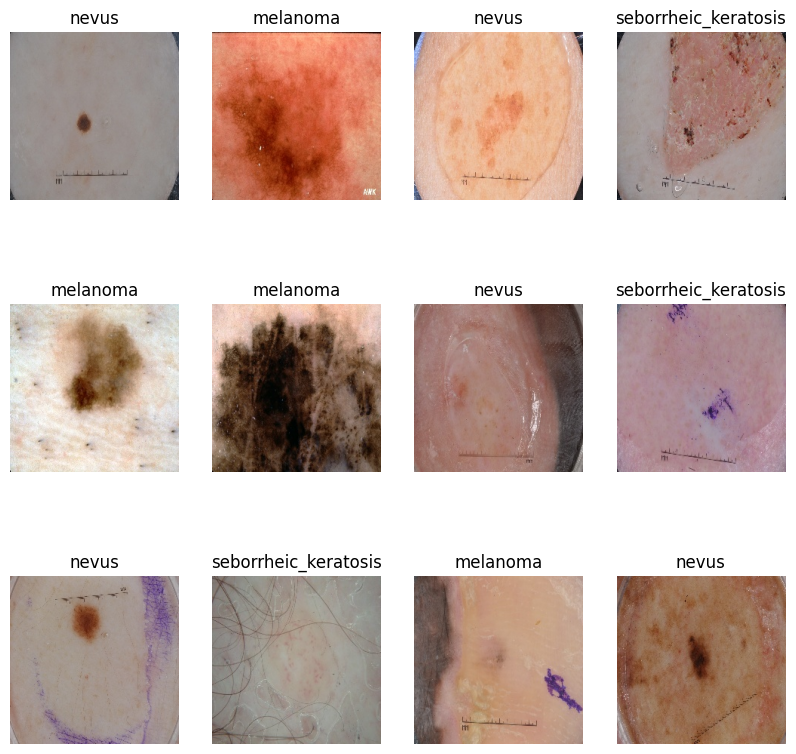

In [39]:

plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(class_names[label_batch[i]])

In [40]:
def get_datset_partition_tf(ds , train_split = 0.8 , val_split = 0.1 , test_split = 0.1 , shuffle=True , shuffle_size = 10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size , seed=12)
    
    train_size = int(ds_size*train_split)
    val_size = int(ds_size*val_split)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [41]:

train_ds , val_ds, test_ds = get_datset_partition_tf(dataset)

In [45]:

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [46]:


resize_and_reshape = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  # Direkt Resizing kullanılır
    layers.Rescaling(1.0 / 255)              # Direkt Rescaling kullanılır
])


In [47]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),  # Güncel kullanım
    tf.keras.layers.RandomRotation(0.2)                      # Güncel kullanım
])


In [48]:

layers = tf.keras.layers

In [49]:
input_shapes = (IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.Conv2D(32,(3,3) , activation='relu' , input_shape = input_shapes),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3) , activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

C:\Users\Monster\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,835 (909.51 KB)

 Trainable params: 232,835 (909.51 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [52]:

EPOCH = 50
history = model.fit(
    train_ds,
    epochs = EPOCH,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data = val_ds
)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 24s 609ms/step - accuracy: 0.4062 - loss: 7.1767 - val_accuracy: 0.4453 - val_loss: 1.0695
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 574ms/step - accuracy: 0.5441 - loss: 0.9191 - val_accuracy: 0.5000 - val_loss: 0.9877
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 563ms/step - accuracy: 0.5659 - loss: 0.9003 - val_accuracy: 0.6328 - val_loss: 0.9110
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 582ms/step - accuracy: 0.5889 - loss: 0.8613 - val_accuracy: 0.5234 - val_loss: 1.0108
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 538ms/step - accuracy: 0.6357 - loss: 0.8252 - val_accuracy: 0.6484 - val_loss: 0.8828
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 17s 498ms/step - accuracy: 0.6363 - loss: 0.8170 - val_accuracy: 0.6562 - val_loss: 0.7977
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 17s 488ms/step - accuracy: 0.6946 - loss: 0.7496 - val_accuracy: 0.6719 - val_loss: 0.7991
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 546ms/step - accuracy: 0.7201 - loss: 0.6788 - val_accu

In [53]:
model.save('Nevus2.h5')

In [54]:
scores = model.evaluate(test_ds)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - accuracy: 0.9009 - loss: 1.1112


In [ ]:

class_names
# LogistischeRegression()
# 

['melanoma', 'nevus', 'seborrheic_keratosis']

In [56]:
model = tf.keras.models.load_model('Nevus2.h5')


first image to predict
actual label: seborrheic_keratosis
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
predicted label :  seborrheic_keratosis


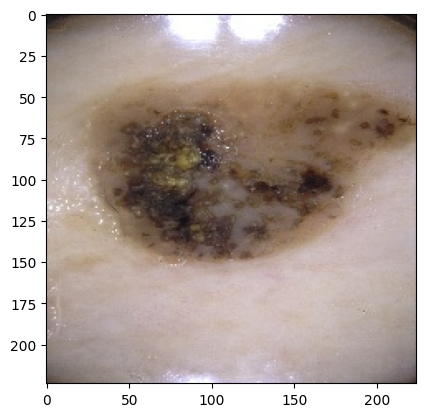

In [57]:
for images_batch , labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print('first image to predict')
    plt.imshow(first_image)
    print('actual label:' , class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print('predicted label : ' , class_names[np.argmax(batch_prediction[0])])

In [58]:

from PIL import Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[9.5562959e-01 5.6393892e-06 4.4364747e-02]]
melanoma
0.9556296


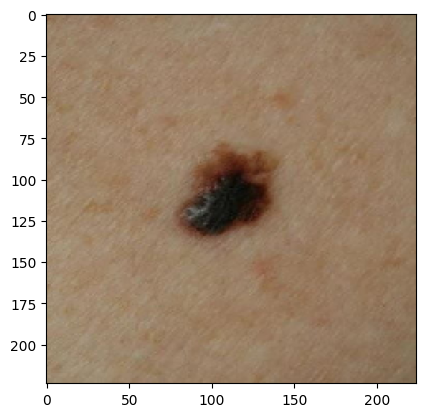

In [61]:
image_path = 'D://ProjeDerin//Training_Models//Test_Nevus//6.jpg'
image = tf.keras.preprocessing.image.load_img(image_path , target_size=(IMAGE_SIZE,IMAGE_SIZE))
image_arr = tf.keras.preprocessing.image.img_to_array(image)
x_train = np.expand_dims(image_arr , axis=0)
prediction = model.predict(x_train)
confidence = np.max(prediction)
print(prediction)
print(class_names[np.argmax(prediction)])
print(confidence)
plt.imshow(image)
plt.show()